In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/dogs-vs-cats-vvsmall.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [2]:
base_dir = '/tmp/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')

In [3]:
train_cats_dir = os.path.join(train_dir,'cats')

In [4]:
train_dogs_dir = os.path.join(train_dir,'dogs')

In [5]:
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [6]:
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [8]:
train_cats_names = os.listdir(train_cats_dir)
print(train_cats_names[:10])

train_dogs_names = os.listdir(train_dogs_dir)
print(train_dogs_names[:10])

validation_cats_hames = os.listdir(validation_cats_dir)
print(validation_cats_hames[:10])

validation_dogs_names = os.listdir(validation_dogs_dir)
print(validation_dogs_names[:10])

['cat.1766.jpg', 'cat.2094.jpg', 'cat.2398.jpg', 'cat.1550.jpg', 'cat.856.jpg', 'cat.1880.jpg', 'cat.229.jpg', 'cat.2909.jpg', 'cat.2849.jpg', 'cat.2039.jpg']
['dog.2501.jpg', 'dog.473.jpg', 'dog.1659.jpg', 'dog.2343.jpg', 'dog.1687.jpg', 'dog.2917.jpg', 'dog.1503.jpg', 'dog.1516.jpg', 'dog.1693.jpg', 'dog.2691.jpg']
['cat.8522.jpg', 'cat.9389.jpg', 'cat.8733.jpg', 'cat.8698.jpg', 'cat.8737.jpg', 'cat.8590.jpg', 'cat.8601.jpg', 'cat.8889.jpg', 'cat.8528.jpg', 'cat.8690.jpg']
['dog.8501.jpg', 'dog.9061.jpg', 'dog.9355.jpg', 'dog.9266.jpg', 'dog.9072.jpg', 'dog.8959.jpg', 'dog.8723.jpg', 'dog.8721.jpg', 'dog.8663.jpg', 'dog.8637.jpg']


In [9]:
# print out the number of images in the directories
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

total training cats images: 3000
total training dogs images: 3000
total validation cats images: 900
total validation dogs images: 900


In [15]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)



In [19]:
train_generator = train_datagen.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/',
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/',
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))


Found 7800 images belonging to 2 classes.
Found 7800 images belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 63s 625ms/step - loss: 0.5991 - accuracy: 0.7565 - val_loss: 0.5515 - val_accuracy: 0.7610
Epoch 2/50
100/100 [==============================] - 62s 622ms/step - loss: 0.5674 - accuracy: 0.7585 - val_loss: 0.5346 - val_accuracy: 0.7750
Epoch 3/50
100/100 [==============================] - 62s 620ms/step - loss: 0.5472 - accuracy: 0.7700 - val_loss: 0.5744 - val_accuracy: 0.7410
Epoch 4/50
100/100 [==============================] - 62s 621ms/step - loss: 0.5338 - accuracy: 0.7805 - val_loss: 0.5558 - val_accuracy: 0.7610
Epoch 5/50
100/100 [==============================] - 63s 625ms/step - loss: 0.5319 - accuracy: 0.7785 - val_loss: 0.5514 - val_accuracy: 0.7590
Epoch 6/50
100/100 [==============================] - 63s 628ms/step - loss: 0.5461 - accuracy: 0.7715 - val_loss: 0.5411 - val_accuracy: 0.7820
Epoch 7/50
100/100 [==============================] - 64s 638ms/step - loss: 0.5579 - accuracy: 0.7580 - val_loss: 0.5396 - val_ac

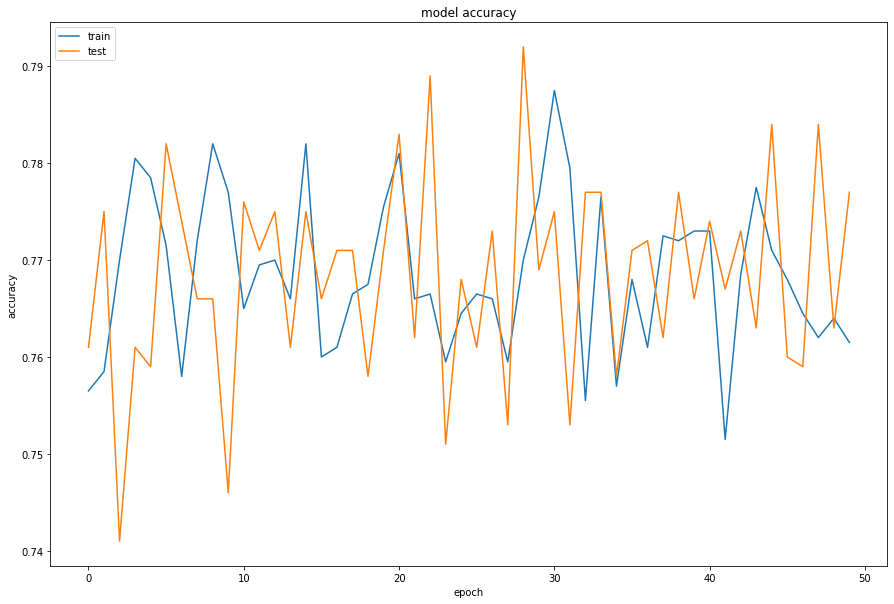

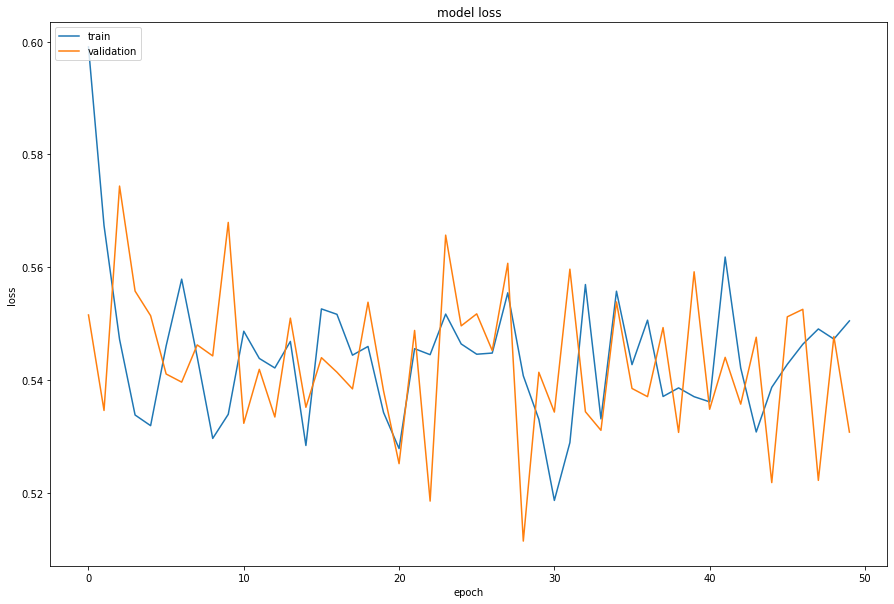

In [24]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()